In [1]:

Get the Data
Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from StackExchange to get your own .csv file


select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
new_df = pd.read_csv("QueryResults.csv")

In [18]:
df = new_df.rename(columns = {"m":"DATE", "TagName": "TAG", 'Unnamed: 2': 'POSTS'})

In [19]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [20]:
df.shape

(2118, 3)

In [21]:
df.count()

DATE     2118
TAG      2118
POSTS    2118
dtype: int64

In [22]:
df.tail()

,DATE,TAG,POSTS
2113,2021-04-01 00:00:00,swift,2625
2114,2021-04-01 00:00:00,r,5636
2115,2021-04-01 00:00:00,ruby,615
2116,2021-04-01 00:00:00,delphi,192
2117,2021-04-01 00:00:00,go,736


In [24]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,153,153
c,153,153
c#,154,154
c++,153,153
delphi,153,153
go,138,138
java,153,153
javascript,153,153
perl,153,153


In [26]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,37587
c,356966
c#,1474287
c++,721437
delphi,47924
go,53170
java,1768185
javascript,2204338
perl,65387


In [27]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [30]:
print(type(pd.to_datetime(df['DATE'][1])))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [41]:
df.DATE = pd.to_datetime(df.DATE)

In [43]:
print(type(df['DATE'][3]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [44]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [49]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,165.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,753.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,160.0,NaN


In [46]:
reshaped_df.shape

(154, 14)

In [47]:
df.tail()

,DATE,TAG,POSTS
2113,2021-04-01,swift,2625
2114,2021-04-01,r,5636
2115,2021-04-01,ruby,615
2116,2021-04-01,delphi,192
2117,2021-04-01,go,736


In [48]:
reshaped_df.tail()

POSTS                                                            \
TAG        assembly       c      c#     c++ delphi     go     java javascript   
DATE                                                                            
2020-12-01    317.0  2793.0  6516.0  4856.0  213.0  581.0   9402.0    18595.0   
2021-01-01    337.0  2766.0  6995.0  4565.0  211.0  608.0   9677.0    19759.0   
2021-02-01    256.0  2367.0  6632.0  4493.0  203.0  631.0   9244.0    18104.0   
2021-03-01    342.0  2680.0  7382.0  4777.0  271.0  831.0  10541.0    19993.0   
2021-04-01    379.0  2587.0  7192.0  4633.0  192.0  736.0  10016.0    19607.0   

                                                           
TAG          perl     php   python       r   ruby   swift  
DATE                                                       
2020-12-01  131.0  5595.0  25640.0  4962.0  560.0  2453.0  
2021-01-01  146.0  5762.0  26667.0  5030.0  590.0  2788.0  
2021-02-01  134.0  5318.0  25181.0  5003.0  605.0  2742.0  
2021-03-01  154.0  5668.0  28448.0  6023.0  571.0  2938.0  
2021-04-01  148.0  5735.0  27700.0  5636.0  615.0  2625.0

In [50]:
reshaped_df.fillna(0, inplace=True)

In [51]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,165.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,753.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,160.0,0.0


In [57]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


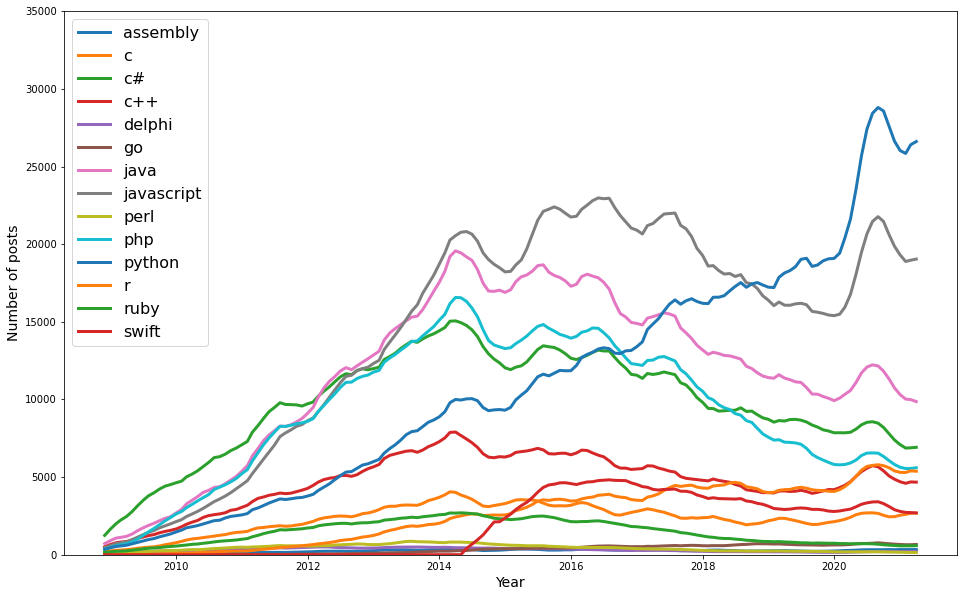

In [87]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column],
    linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)